In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN: (28,28) → (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

def create_cnn(activation_fn):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3,3), activation=activation_fn),
        Conv2D(64, (3,3), activation=activation_fn),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation=activation_fn),
        Dense(10, activation='softmax')
    ])
    return model

In [4]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD()
epochs = 10
batch_size = 128

In [5]:
model_sigmoid = create_cnn('sigmoid')

model_sigmoid.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1048 - loss: 2.3252 - val_accuracy: 0.1032 - val_loss: 2.3026
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1047 - loss: 2.3080 - val_accuracy: 0.1028 - val_loss: 2.3025
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1090 - loss: 2.3053 - val_accuracy: 0.1135 - val_loss: 2.3002
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1091 - loss: 2.3038 - val_accuracy: 0.1032 - val_loss: 2.3010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1082 - loss: 2.3025 - val_accuracy: 0.1135 - val_loss: 2.3002
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1121 - loss: 2.3021 - val_accuracy: 0.1135 - val_loss: 2.2988
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1178 - loss: 2.3002 - val_accuracy: 0.1135 - val_loss: 2.2966
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1187 - loss: 2.2985 - val_accuracy: 

In [7]:
import numpy as np

In [10]:
model_tanh = create_cnn('tanh')

optimizer_tanh = SGD()   # NEW optimizer

model_tanh.compile(
    optimizer=optimizer_tanh,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_tanh = model_tanh.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6955 - loss: 1.1410 - val_accuracy: 0.9085 - val_loss: 0.3246
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9021 - loss: 0.3340 - val_accuracy: 0.9248 - val_loss: 0.2571
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9186 - loss: 0.2738 - val_accuracy: 0.9349 - val_loss: 0.2235
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9306 - loss: 0.2347 - val_accuracy: 0.9429 - val_loss: 0.1954
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9384 - loss: 0.2126 - val_accuracy: 0.9493 - val_loss: 0.1773
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9455 - loss: 0.1857 - val_accuracy: 0.9540 - val_loss: 0.1622
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9481 - loss: 0.1783 - val_accuracy: 0.9566 - val_loss: 0.1508
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9544 - loss: 0.1601 - val_accuracy: 

In [12]:
model_relu = create_cnn('relu')

optimizer_relu = tf.keras.optimizers.SGD()  # NEW optimizer

model_relu.compile(
    optimizer=optimizer_relu,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_relu = model_relu.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5589 - loss: 1.5429 - val_accuracy: 0.9051 - val_loss: 0.3150
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8976 - loss: 0.3370 - val_accuracy: 0.9313 - val_loss: 0.2317
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9189 - loss: 0.2678 - val_accuracy: 0.9407 - val_loss: 0.1911
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9341 - loss: 0.2257 - val_accuracy: 0.9517 - val_loss: 0.1643
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9431 - loss: 0.1858 - val_accuracy: 0.9567 - val_loss: 0.1418
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9487 - loss: 0.1692 - val_accuracy: 0.9637 - val_loss: 0.1210
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9553 - loss: 0.1464 - val_accuracy: 0.9658 - val_loss: 0.1114
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9595 - loss: 0.1324 - val_accuracy: 0

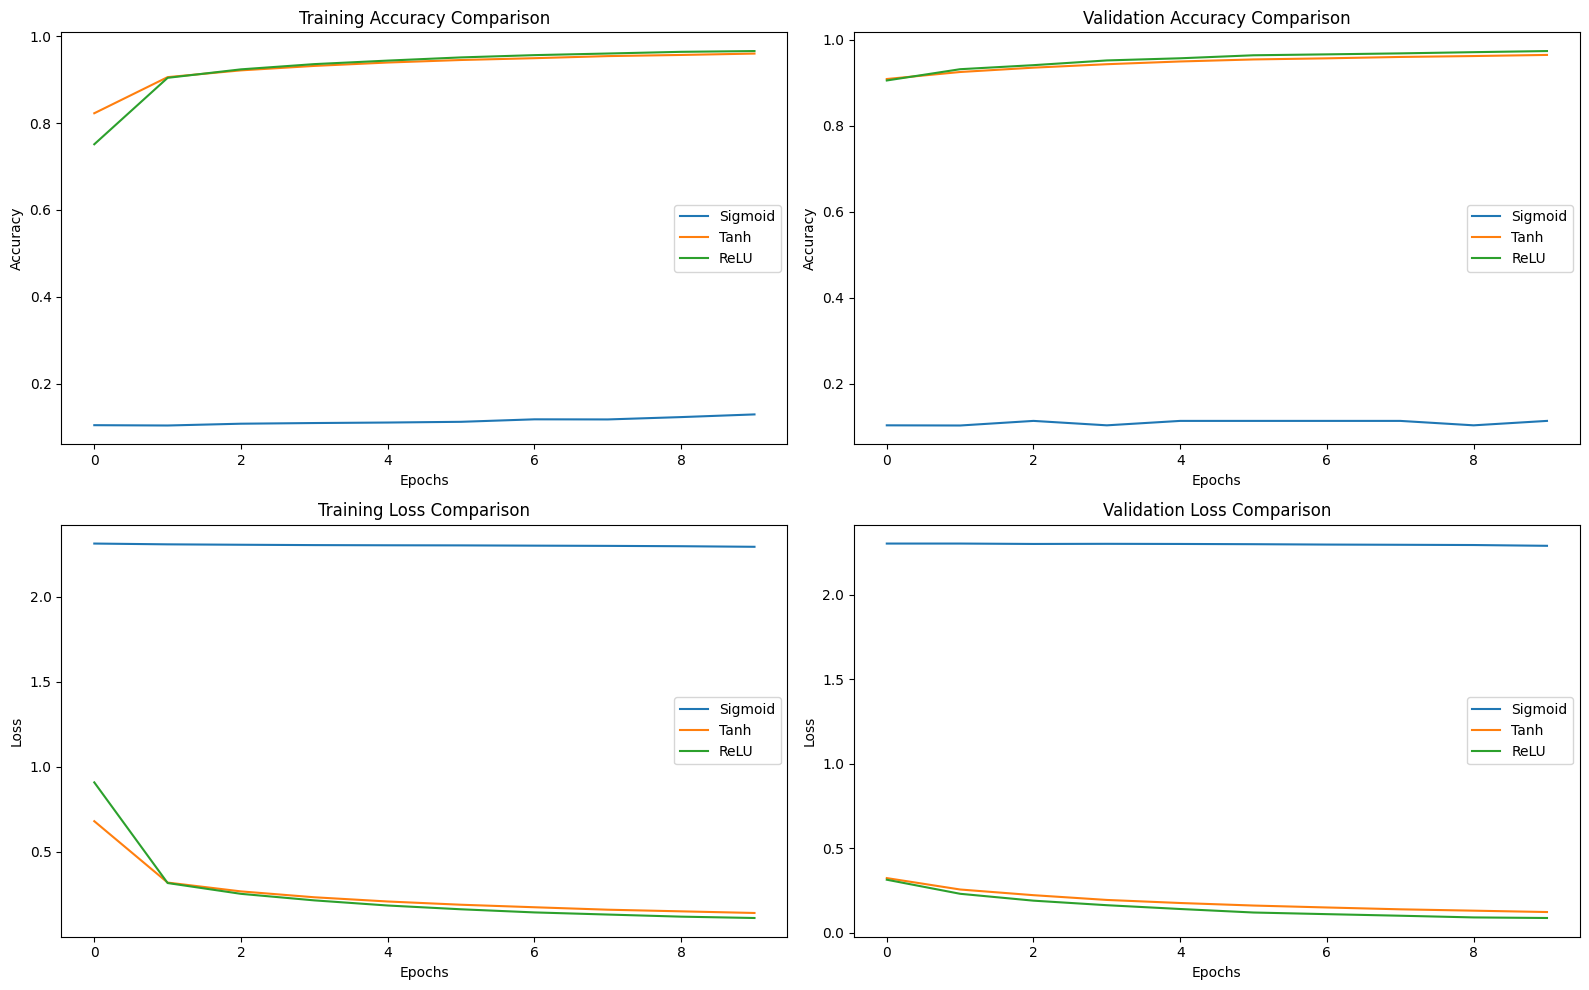

In [15]:
plt.figure(figsize=(16,10))

# ================= Accuracy (Train) =================
plt.subplot(2,2,1)
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['accuracy'], label='Tanh')
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ================= Accuracy (Validation) =================
plt.subplot(2,2,2)
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ================= Loss (Train) =================
plt.subplot(2,2,3)
plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.plot(history_tanh.history['loss'], label='Tanh')
plt.plot(history_relu.history['loss'], label='ReLU')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# ================= Loss (Validation) =================
plt.subplot(2,2,4)
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
plt.plot(history_tanh.history['val_loss'], label='Tanh')
plt.plot(history_relu.history['val_loss'], label='ReLU')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
print("Final Validation Accuracy:")
print("Sigmoid:", history_sigmoid.history['val_accuracy'][-1])
print("Tanh   :", history_tanh.history['val_accuracy'][-1])
print("ReLU   :", history_relu.history['val_accuracy'][-1])

Final Validation Accuracy:
Sigmoid: 0.11349999904632568
Tanh   : 0.9645000100135803
ReLU   : 0.9735000133514404


TASK 2

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

def create_cnn_relu():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [19]:
epochs = 10
batch_size = 128

In [20]:
from tensorflow.keras.optimizers import SGD

model_sgd = create_cnn_relu()

model_sgd.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_sgd = model_sgd.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6001 - loss: 1.3492 - val_accuracy: 0.9122 - val_loss: 0.2949
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9028 - loss: 0.3233 - val_accuracy: 0.9323 - val_loss: 0.2315
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9239 - loss: 0.2558 - val_accuracy: 0.9441 - val_loss: 0.1885
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9350 - loss: 0.2142 - val_accuracy: 0.9531 - val_loss: 0.1605
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9457 - loss: 0.1778 - val_accuracy: 0.9603 - val_loss: 0.1321
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9527 - loss: 0.1572 - val_accuracy: 0.9615 - val_loss: 0.1343
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9551 - loss: 0.1456 - val_accuracy: 0.9652 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9605 - loss: 0.1308 - val_accuracy: 0

In [21]:
model_momentum = create_cnn_relu()

model_momentum.compile(
    optimizer=SGD(momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_momentum = model_momentum.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7642 - loss: 0.7650 - val_accuracy: 0.9692 - val_loss: 0.1010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9697 - loss: 0.1021 - val_accuracy: 0.9817 - val_loss: 0.0584
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9805 - val_loss: 0.0574
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9869 - val_loss: 0.0417
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9863 - val_loss: 0.0369
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9891 - loss: 0.0324 - val_accuracy: 0.9879 - val_loss: 0.0356
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9875 - val_loss: 0.0353
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0

In [22]:
from tensorflow.keras.optimizers import Adam

model_adam = create_cnn_relu()

model_adam.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_adam = model_adam.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8856 - loss: 0.3793 - val_accuracy: 0.9859 - val_loss: 0.0467
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9871 - val_loss: 0.0404
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9902 - val_loss: 0.0316
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 0.9887 - val_loss: 0.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9887 - val_loss: 0.0329
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9905 - val_loss: 0.0311
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9903 - val_loss: 0.0331
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0

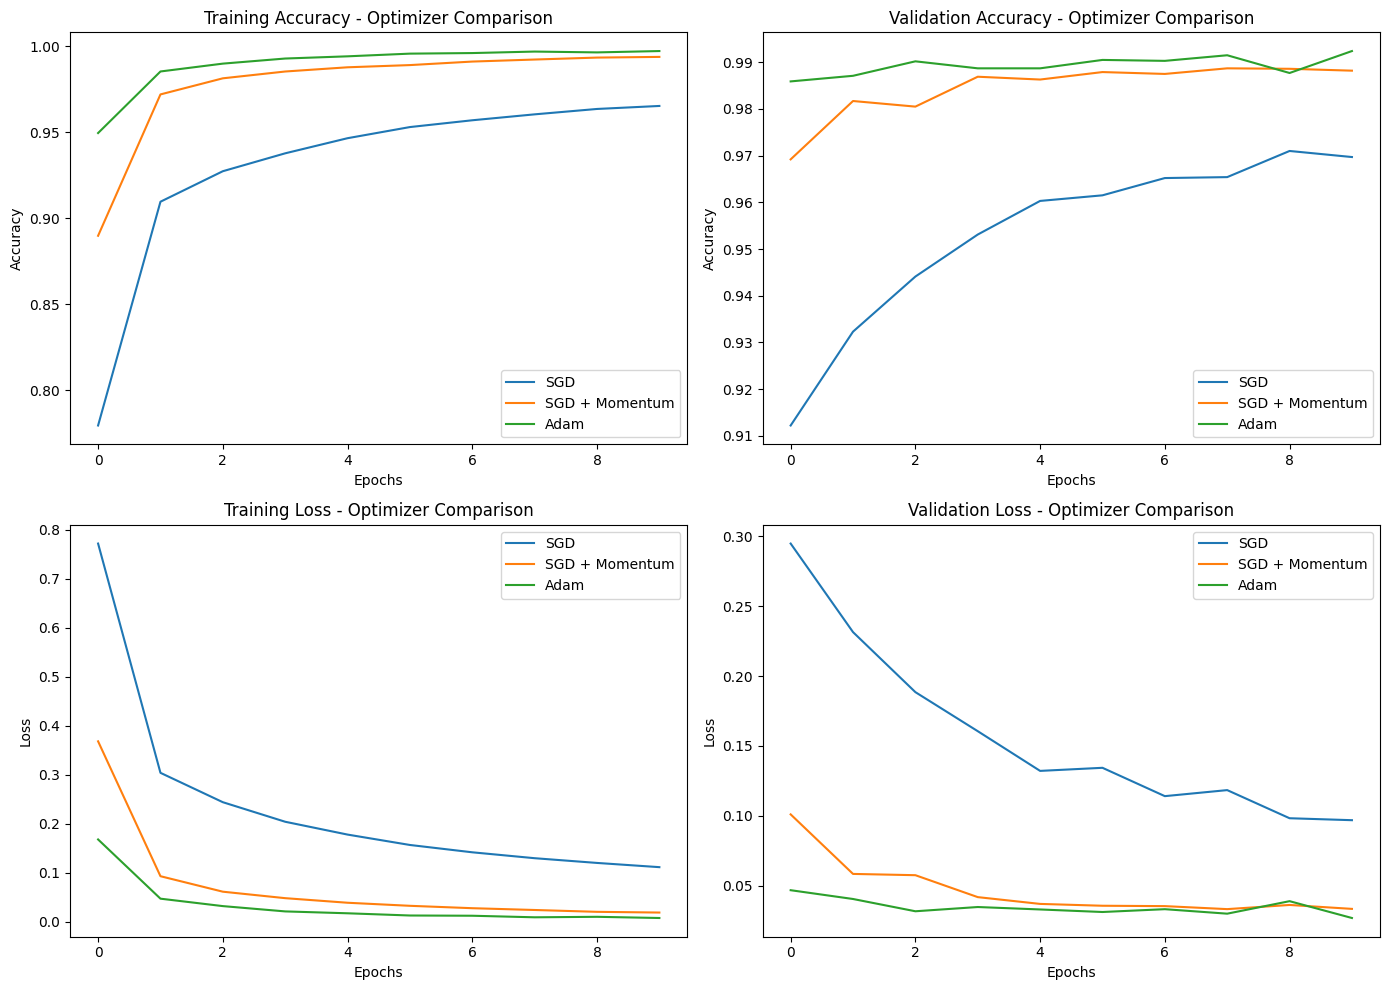

In [23]:
plt.figure(figsize=(14,10))

# -------- Training Accuracy --------
plt.subplot(2,2,1)
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_momentum.history['accuracy'], label='SGD + Momentum')
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.title('Training Accuracy - Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# -------- Validation Accuracy --------
plt.subplot(2,2,2)
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_momentum.history['val_accuracy'], label='SGD + Momentum')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title('Validation Accuracy - Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# -------- Training Loss --------
plt.subplot(2,2,3)
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_momentum.history['loss'], label='SGD + Momentum')
plt.plot(history_adam.history['loss'], label='Adam')
plt.title('Training Loss - Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# -------- Validation Loss --------
plt.subplot(2,2,4)
plt.plot(history_sgd.history['val_loss'], label='SGD')
plt.plot(history_momentum.history['val_loss'], label='SGD + Momentum')
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.title('Validation Loss - Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
print("Final Validation Accuracy:")
print("SGD           :", history_sgd.history['val_accuracy'][-1])
print("SGD + Momentum:", history_momentum.history['val_accuracy'][-1])
print("Adam          :", history_adam.history['val_accuracy'][-1])

Final Validation Accuracy:
SGD           : 0.9696999788284302
SGD + Momentum: 0.9882000088691711
Adam          : 0.9923999905586243


TASK 3

In [36]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dropout,
    Flatten, Dense, Input, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

In [40]:
def model_no_bn_no_dropout():
    model = Sequential([
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [41]:
def model_no_bn_dropout():
    model = Sequential([
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])
    return model

In [42]:
def model_bn_dropout():
    model = Sequential([
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ])
    return model

In [43]:
epochs = 10
batch_size = 128
optimizer = Adam()

In [44]:
model_1 = model_no_bn_no_dropout()
model_1.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.8951 - loss: 0.3523 - val_accuracy: 0.9840 - val_loss: 0.0478
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9859 - val_loss: 0.0451
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9871 - val_loss: 0.0420
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9890 - val_loss: 0.0340
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9963 - loss: 0.0126 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9902 - val_loss: 0.0330
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9981 - loss: 0.0058 - 

In [48]:
model_2 = model_no_bn_dropout()
model_2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.8935 - loss: 0.3548 - val_accuracy: 0.9850 - val_loss: 0.0498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9851 - loss: 0.0511 - val_accuracy: 0.9872 - val_loss: 0.0371
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9907 - loss: 0.0313 - val_accuracy: 0.9877 - val_loss: 0.0348
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9883 - val_loss: 0.0340
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9898 - val_loss: 0.0344
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9957 - loss: 0.0116 - val_accuracy: 0.9902 - val_loss: 0.0350
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9967 - loss: 0.0102 - 

In [49]:
model_3 = model_bn_dropout()
model_3.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.9267 - loss: 0.2466 - val_accuracy: 0.6629 - val_loss: 0.9486
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9881 - loss: 0.0420 - val_accuracy: 0.9824 - val_loss: 0.0529
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9878 - val_loss: 0.0359
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9952 - loss: 0.0165 - val_accuracy: 0.9875 - val_loss: 0.0397
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9894 - val_loss: 0.0322
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9905 - val_loss: 0.0321
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 125ms/step - accuracy: 0.9966 - loss: 0

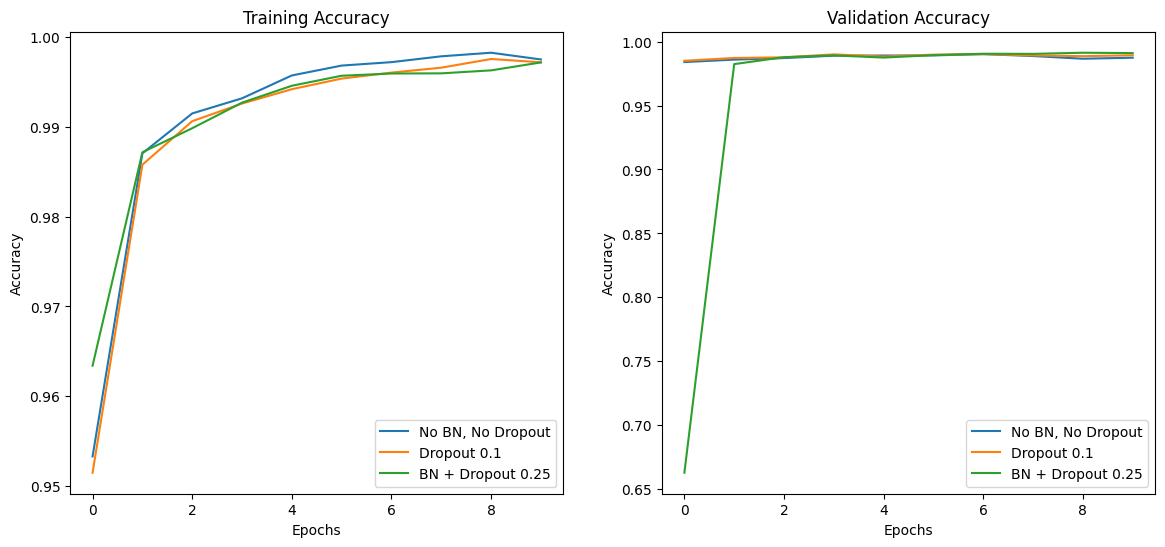

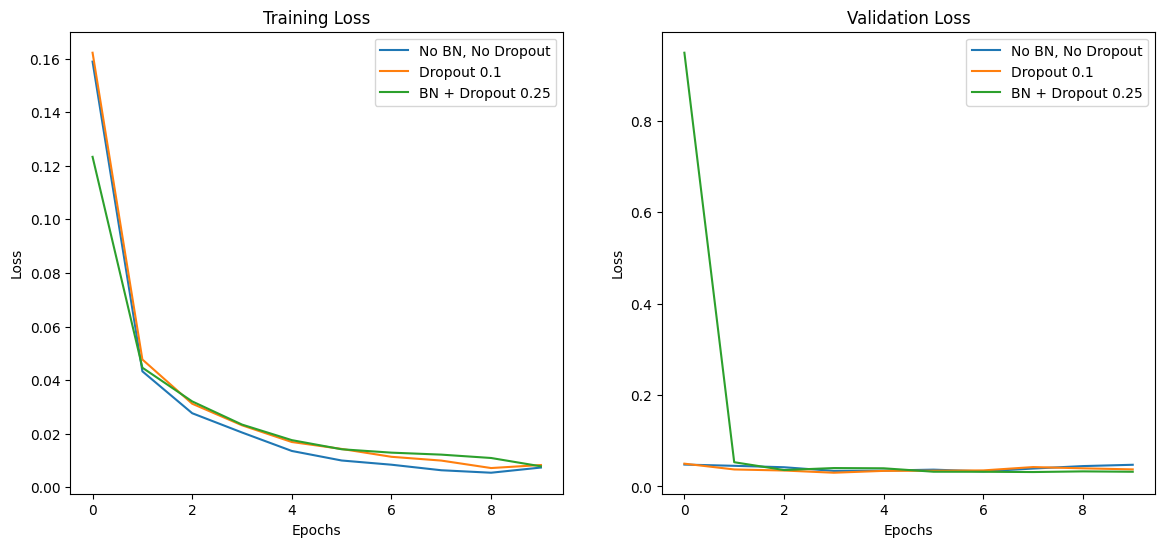

In [53]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='No BN, No Dropout')
plt.plot(history_2.history['accuracy'], label='Dropout 0.1')
plt.plot(history_3.history['accuracy'], label='BN + Dropout 0.25')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1.history['val_accuracy'], label='No BN, No Dropout')
plt.plot(history_2.history['val_accuracy'], label='Dropout 0.1')
plt.plot(history_3.history['val_accuracy'], label='BN + Dropout 0.25')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(history_1.history['loss'], label='No BN, No Dropout')
plt.plot(history_2.history['loss'], label='Dropout 0.1')
plt.plot(history_3.history['loss'], label='BN + Dropout 0.25')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1.history['val_loss'], label='No BN, No Dropout')
plt.plot(history_2.history['val_loss'], label='Dropout 0.1')
plt.plot(history_3.history['val_loss'], label='BN + Dropout 0.25')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [54]:
print("Final Validation Accuracy:")
print("No BN, No Dropout     :", history_1.history['val_accuracy'][-1])
print("Dropout 0.1           :", history_2.history['val_accuracy'][-1])
print("BN + Dropout 0.25     :", history_3.history['val_accuracy'][-1])

Final Validation Accuracy:
No BN, No Dropout     : 0.9873999953269958
Dropout 0.1           : 0.989300012588501
BN + Dropout 0.25     : 0.9909999966621399
